<a href="https://colab.research.google.com/github/rohit-1026/Zomato-Restaurant-Clustering-and-Sentiment-Analysis/blob/main/ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing Required libraries 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
from datetime import datetime

import warnings    
warnings.filterwarnings('ignore')

In [ ]:
#loading the Restaurant dataset
rest_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone Project/Unsupervised ML-Zomato_Restaurant/Zomato Restaurant names and Metadata.csv")
#first five rows
rest_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
#loading customer review dataset
review_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone Project/Unsupervised ML-Zomato_Restaurant/Zomato Restaurant reviews.csv")
#first five rows
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


##**1.Data Pre-processing and Cleaning**

**1.1Restaurant Dataset**

In [ ]:
#shape of restaurant dataset
print('The number of Rows and Column in the restaurant dataset is {} and {} respectively'.format(rest_df.shape[0],rest_df.shape[1]))


The number of Rows and Column in the restaurant dataset is 105 and 6 respectively


In [ ]:
#checking the Null value present if any
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In collections column have more than 50% of null value. collections nothing but tagging the restaurants w.r.to zomato and its not usefull information of Machine learing model analyasis. So drop collections column as better decision one.

In [ ]:
#dropping the collection columns in restaurant dataset
rest_df.drop('Collections', axis=1, inplace=True)

In [ ]:
#once again checking the null value if any in restaurant 
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      105 non-null    object
 1   Links     105 non-null    object
 2   Cost      105 non-null    object
 3   Cuisines  105 non-null    object
 4   Timings   104 non-null    object
dtypes: object(5)
memory usage: 4.2+ KB


still one null value present in timing column and later we can deal with that. hope that this timings columns not usefull for model analysis.let see

Data type of cost column lokk like object and need to convert into integer data type.

In [ ]:
# changing cost datatype
rest_df['Cost'] = rest_df['Cost'].str.replace(',','')
rest_df['Cost'] = rest_df['Cost'].astype('int')

In [ ]:
#once again checking
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      105 non-null    object
 1   Links     105 non-null    object
 2   Cost      105 non-null    int64 
 3   Cuisines  105 non-null    object
 4   Timings   104 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


Now cost  dtype is integer and fine with model analysis

**1.2 Reviewer Dataset**

In [ ]:
#shape of restaurant dataset
print('The number of Rows and Columns in the Review dataset is {} and {} respectively'.format(review_df.shape[0],review_df.shape[1]))

The number of Rows and Columns in the Review dataset is 10000 and 7 respectively


In [ ]:
#checking the null in review dataset if any
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


Other than restaurant and pictures column there are huge null value in the dataset. highest null values in review columns. so we will drop all null values which are present in the review column and it may look like smooth without any unwanted datas

In [ ]:
#dropping null rows in reviews first
review_df.dropna(subset = ["Review"], inplace=True)

In [ ]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  9955 non-null   object
 1   Reviewer    9955 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9955 non-null   object
 4   Metadata    9955 non-null   object
 5   Time        9955 non-null   object
 6   Pictures    9955 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 622.2+ KB


In [ ]:
# checking null again if any
review_df.isnull().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

**Great!!** Now there is no null value in the Review dataset.

In [ ]:
#final shape of restaurant dataset
print('Now number of Rows and Columns in the Review dataset  after dropping the null values  {} and {} respectively'.format(review_df.shape[0],review_df.shape[1]))

Now number of Rows and Columns in the Review dataset  after dropping the null values  9955 and 7 respectively


In [ ]:
#why rating is in object type???
review_df['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like'],
      dtype=object)

**oooppppsss...!!!!!** There is object data type **Like** present in the rating column. so we will replace with suitable integer value and make float data type in the  column of rating in the review dataset

In [ ]:
# correcting and changing the datatype of Rating Column
review_df['Rating'] = review_df['Rating'].replace('Like','4')
review_df['Rating'] = review_df['Rating'].astype('float')

In [ ]:
#information of review dataset
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  9955 non-null   object 
 1   Reviewer    9955 non-null   object 
 2   Review      9955 non-null   object 
 3   Rating      9955 non-null   float64
 4   Metadata    9955 non-null   object 
 5   Time        9955 non-null   object 
 6   Pictures    9955 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 622.2+ KB


Now our review dataset have no null values and ready for Feature Engineering 

##**2.Feature Engineering**

Feature Engineering is nothing but manipulating, removing, transforming the feature for usefull manner to the Machine Learning Model analysis.

**2.1 Zomato Restaurant Dataset**



> In the Restaurant dataset Links , Cuisines and timings columns are not interpretable directly. so we need to extract the location of restaurant from links column and cuisines column to be clubbed to make useful information. Timings can be categorized into three categories to make analysis a little simpler or else we will drop later.







In [ ]:
#restaurant columns
rest_df.columns

Index(['Name', 'Links', 'Cost', 'Cuisines', 'Timings'], dtype='object')

**2.1.1.Links Column**

In the link column let we check any useful information by extracting the link

In [ ]:
# link value
rest_df.loc[:10,'Links']

0     https://www.zomato.com/hyderabad/beyond-flavou...
1     https://www.zomato.com/hyderabad/paradise-gach...
2     https://www.zomato.com/hyderabad/flechazo-gach...
3     https://www.zomato.com/hyderabad/shah-ghouse-h...
4     https://www.zomato.com/hyderabad/over-the-moon...
5     https://www.zomato.com/hyderabad/the-fisherman...
6     https://www.zomato.com/hyderabad/eat-fit-gachi...
7     https://www.zomato.com/hyderabad/shah-ghouse-s...
8     https://www.zomato.com/hyderabad/hyper-local-g...
9     https://www.zomato.com/hyderabad/cream-stone-g...
10    https://www.zomato.com/hyderabad/sardarjis-cha...
Name: Links, dtype: object

Each link there is only one location hydrabad and let we try to extract from the link

In [ ]:
#Function to extract restaurant Location from the links
def location(links):
  locations=links.split("/")
  return locations[3]

#calling the function to apply links column 
rest_df['Location']=rest_df['Links'].apply(location)
rest_df.head(3)

,Name,Links,Cost,Cuisines,Timings,Location
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",hyderabad
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,"Biryani, North Indian, Chinese",11 AM to 11 PM,hyderabad
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",hyderabad


In [ ]:
#checking the number of city present in the restaurant dataset
rest_df.Location.value_counts()

hyderabad             104
thetiltbarrepublic      1
Name: Location, dtype: int64

only Hydrabad location present in the restaurant dataset and 'thetiltbarrepublic' came due to different style of url. hope all 105 rows are  having same Hydrabad location

**Conclusion**

> Due to only location of hydrabad does't make any sense in modeling and we can understand that this restaurants  are only from Hydrabad. So we will drop Location and followed by Links, timing columns from restaurant dataset. 



In [ ]:
#dropping unnecessary columns in the restaurant dataset
rest_df.drop(['Links','Location','Timings'],axis=1,inplace=True)

In [ ]:
rest_df[:1]

,Name,Cost,Cuisines
0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I..."


**2.1.2.Cuisines Column**

In the cuisines column each restaurant have combination of different cuisines served and we need to make dummy variable to respect restaurant for machine learning. the procedure followed as

1) store the all cuisines as list type w.r.t restaurant and

2) make a single list of all cuisine 

3)create frequency of  dictionary of cuisine  present overall in dataset.

4)An attempt is made to the club and categorize various misspelled cuisines and get a minimized number of unique cuisines.

5)Next, we need these cuisines in the one-hot encoded form. To get these a data frame is created with the unique cuisines as columns and if a particular restaurant has this cuisine available we get a positive.

In [ ]:
#Create Function to find the frequency of cuisine present in the dataset

def freq_cuisines(df):
  #create list by splitting to make list type instead of string
  df['Cuisines'] = df['Cuisines'].apply(lambda x : x.split(','))

  #creating a list of all cuisine lists w.r.t each  restaurants
  cuisine_lists = []
  for index in df.index:
    cuisine_lists.append(df['Cuisines'][index])
  #creating a flat single list by nested for loop
  single_cuisine_list = [item for sublist in cuisine_lists for item in sublist]
  #frequency dict
  frequency_cuisines = {}
  for elem in single_cuisine_list:
    if elem not in frequency_cuisines.keys():
      frequency_cuisines[elem] = single_cuisine_list.count(elem)
    else:
      pass
  return print(frequency_cuisines)
#calling the function and print the frequency of cuisines
freq_cuisines(rest_df)

{'Chinese': 7, ' Continental': 17, ' Kebab': 5, ' European': 2, ' South Indian': 7, ' North Indian': 28, 'Biryani': 4, ' Chinese': 36, 'Asian': 5, ' Mediterranean': 4, ' Desserts': 11, ' Seafood': 3, ' Beverages': 5, 'Seafood': 1, ' Goan': 1, ' Asian': 10, 'Healthy Food': 1, 'Lebanese': 1, 'American': 4, 'Ice Cream': 2, 'Street Food': 2, ' Fast Food': 10, 'Mediterranean': 1, ' BBQ': 1, 'Continental': 4, ' American': 2, 'North Indian': 33, ' Italian': 12, ' Finger Food': 1, 'European': 2, 'Burger': 2, ' Biryani': 12, ' Japanese': 2, ' Salad': 5, ' Sushi': 4, 'Mexican': 1, 'Mughlai': 1, 'Fast Food': 5, 'Andhra': 3, 'Bakery': 6, ' Mughlai': 5, ' Juices': 1, 'Arabian': 1, 'Italian': 2, ' Andhra': 3, ' Hyderabadi': 3, 'Cafe': 5, ' Spanish': 1, ' Wraps': 1, 'Finger Food': 1, ' Thai': 2, ' Indonesian': 1, 'South Indian': 2, ' Bakery': 1, 'Modern Indian': 1, 'Desserts': 2, 'Kebab': 1, ' Momos': 3, 'BBQ': 1, ' Modern Indian': 1, ' Burger': 3, 'Momos': 1, ' Pizza': 1, ' Arabian': 1, 'North Easte

**Observation**

from the above frequency of cuisine list shows that there is misspelled in cuisine . for example there are two type of BBQ cuisine such as " BBQ" and "BBQ" . so there is space before cuisine name and its amke lengthy list.


Another point to note is there are various unnecessary categories made. For example, there are 'Chinese' and ' Momos' both in the dataset as different cuisines. Let's try to club and correct them.

In [ ]:
#minimising the number of cuisines by sorting and categorizing them out
cuisine_dict = {'Chinese':['Chinese',' Chinese','Momos',' Momos'],'North Indian':['North Indian',' North Indian',' BBQ','BBQ',' Biryani','Biryani','Kebab',' Kebab'],'Continental':['Continental',' Continental',' American','American',' BBQ','BBQ','Burger',' Burger','Finger Food',' Finger Food', ' Juices',' Pizza',' Salad',' Wraps'],
                'Andhra':['Andhra',' Andhra'],'Arabian':['Arabian',' Arabian'],'Asian': ['Asian',' Asian'],'Bakery':['Bakery',' Bakery'],
                'Beverages':['Beverages',' Beverages'],'Cafe':['Cafe',' Cafe'],'Desserts':['Desserts',' Desserts',' Mithai','Ice Cream'],
                'European':['European',' European',' Spanish'],'Fast Food':['Fast Food',' Fast Food','Burger',' Burger'],'Goan':[' Goan',' Goan'],
                'Hyderabadi':['Hyderabadi',' Hyderabadi',' Biryani','Biryani'],'Indonesian':['Indonesian',' Indonesian'],'Italian':['Italian',' Italian',' Pizza'],
                'Japanese':['Japanese',' Japanese',' Sushi'],'Malaysian':['Malaysian',' Malaysian'],'Mediterranean':['Mediterranean',' Mediterranean'],
                'Modern Indian':['Modern Indian',' Modern Indian',' Salad'],'Mughlai':['Mughlai',' Mughlai',' BBQ','BBQ','Kebab',' Kebab'],
                'Seafood':['Seafood',' Seafood'],'South Indian':['South Indian',' South Indian'],
                'Thai':['Thai',' Thai'],'Healthy Food':['Healthy Food'],'Lebanese':['Lebanese'],'Mexican':['Mexican'],'North Eastern':['North Eastern'],
                'Street Food':['Street Food']}

In [ ]:
#make a copy of rest_df for just safe side
rest_data=rest_df.copy()

In [ ]:
#the function returns a list of error free and mapped cuisines according to the dictionary created
def cuisine_corrector(cuisine):
  list_ = []
  # for every cuisine in the list of a particular row
  for elem in cuisine:
    # and for every key value in the dict
    for key,value in cuisine_dict.items():
      # if cuisine is correct and matches with one of the unique keys we append to the list and break
      if elem == key:
        list_.append(key)
        break
      # next if the other elem doesnot match if search and value and append the key for that value
      if elem in value:
        list_.append(key)
      
  return list(set(list_)) # returns a unique cuisines list

In [ ]:
#correcting and getting the desired lists as row values for cuisines column
rest_data['Cuisines'] = rest_data['Cuisines'].apply(cuisine_corrector)
rest_data.head(3)

,Name,Cost,Cuisines
0,Beyond Flavours,800,"[Continental, Chinese, Mughlai, North Indian, ..."
1,Paradise,800,"[Chinese, Hyderabadi, North Indian]"
2,Flechazo,1300,"[Desserts, Mediterranean, Asian, North Indian]"


Create the dummy columns with respect to cuisines in the rest_data Dataset

In [ ]:
#first create the columns as cuisines list with original dataset by concating
rest_data=pd.concat([rest_data,pd.DataFrame(columns=list(cuisine_dict.keys()))])

In [ ]:
# iterating every row of the new dataframe by iterrows method
for i, row in rest_data.iterrows():
  # and for every row we iterate over the new columns only
  for column in list(rest_data.columns):
      if column not in ['Name','Cost','Cuisines','Timings']:
        # and check if the column is in the list of cuisines available for that row
        if column in row['Cuisines']:
          #then assign it as 1 else 0
          rest_data.loc[i,column] = 1
        else:
          rest_data.loc[i,column] = 0

In [ ]:
#cross check
rest_data.head(1)

,Name,Cost,Cuisines,Chinese,North Indian,Continental,Andhra,Arabian,Asian,Bakery,...,Modern Indian,Mughlai,Seafood,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food
0,Beyond Flavours,800.0,"[Continental, Chinese, Mughlai, North Indian, ...",1,1,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


In [ ]:
#checking the dataset shape
rest_data.shape

(105, 32)

Now our Restaurant Dataset have 32 columns with 105 observations

In [ ]:
#creating a new column for the total number of cusines served by restaurants
rest_data['Total Cuisines'] = rest_data['Cuisines'].apply(lambda x : len(x))
#dropping the Cuisines column
rest_data.drop('Cuisines',axis=1,inplace=True)

In [ ]:
#final dataset of restaurant
rest_data.rename(columns={'Name':'Restaurant Name'}, inplace=True)
rest_data.head(3)

,Restaurant Name,Cost,Chinese,North Indian,Continental,Andhra,Arabian,Asian,Bakery,Beverages,...,Mughlai,Seafood,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food,Total Cuisines
0,Beyond Flavours,800.0,1,1,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,6
1,Paradise,800.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,Flechazo,1300.0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,4


**2.2 Review Dataset to Restaurant Dataset**

In [ ]:
#reviwer Dataset
review_df.head(3)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0


In [ ]:
review_df.shape

(9955, 7)

In [ ]:
#checking number of unique restaurants
review_df.Restaurant.value_counts()

Beyond Flavours               100
PourHouse7                    100
Urban Asia - Kitchen & Bar    100
The Indi Grill                100
The Tilt Bar Republic         100
                             ... 
Being Hungry                   99
Olive Garden                   99
Hyderabad Chefs                98
Arena Eleven                   85
American Wild Wings            77
Name: Restaurant, Length: 100, dtype: int64

There are 100 unique restaurants  available in that review dataset

**2.2.1. Review Rating**

In [ ]:
#Average rating of each restaurants calculated by grouping the restaurant
restaurant_rating=review_df.groupby('Restaurant')['Rating'].mean().reset_index()
#Asending the restaurants by rating and showing top 5 restaurants 
restaurant_rating.rename(columns={'Restaurant':'Restaurant Name','Rating':'Avg Rating'},inplace=True)
restaurant_rating.sort_values(by='Avg Rating', ascending=False).head(5)

,Restaurant Name,Avg Rating
3,AB's - Absolute Barbecues,4.88
11,B-Dubs,4.81
2,"3B's - Buddies, Bar & Barbecue",4.76
67,Paradise,4.70
35,Flechazo,4.66


In [ ]:
restaurant_rating.shape

(100, 2)

**2.2.2. Adding the Avg Rating to original Restaurant Dataset**

In [ ]:
#adding an average rating feature in restaurant names and metadata dataframe
rest_data = rest_data.merge(restaurant_rating,on='Restaurant Name',how='left')
rest_data.head(3)

,Restaurant Name,Cost,Chinese,North Indian,Continental,Andhra,Arabian,Asian,Bakery,Beverages,...,Seafood,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food,Total Cuisines,Avg Rating
0,Beyond Flavours,800.0,1,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,6,4.28
1,Paradise,800.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,4.70
2,Flechazo,1300.0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,4,4.66


Finally Avg Error added in the restaurent dataset and ready for model analysis.

In [ ]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Restaurant Name  105 non-null    object 
 1   Cost             105 non-null    float64
 2   Chinese          105 non-null    object 
 3   North Indian     105 non-null    object 
 4   Continental      105 non-null    object 
 5   Andhra           105 non-null    object 
 6   Arabian          105 non-null    object 
 7   Asian            105 non-null    object 
 8   Bakery           105 non-null    object 
 9   Beverages        105 non-null    object 
 10  Cafe             105 non-null    object 
 11  Desserts         105 non-null    object 
 12  European         105 non-null    object 
 13  Fast Food        105 non-null    object 
 14  Goan             105 non-null    object 
 15  Hyderabadi       105 non-null    object 
 16  Indonesian       105 non-null    object 
 17  Italian         

there are five null rows in the avg rating columns which means that the customer not gave any rating to those restaurant. so we will fill Zero(0) value in that place. 

In [ ]:
rest_data['Avg Rating'].fillna(0, inplace=True)

In [ ]:
#final shape of restaurant dataset shape
print('The final Restaurant Dataset have {} rows and {} columns'.format(rest_data.shape[0],rest_data.shape[1]))

The final Restaurant Dataset have 105 rows and 33 columns


**2.3 Review Dataset Only**

In [ ]:
review_df.head(1)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0


In [ ]:
#droping the time column which wont help for machine learing clustering model
review_df.drop(['Time'],axis=1,inplace=True)

In [ ]:
review_df.head(1)

,Restaurant,Reviewer,Review,Rating,Metadata,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",0


In [ ]:
# splitting meta data into reviews and followers seperately
review_df['Reviews'], review_df['Followers'] = review_df['Metadata'].str.split(',').str
review_df['Reviews'] = pd.to_numeric(review_df['Reviews'].str.split(' ').str[0])
review_df['Followers'] = pd.to_numeric(review_df['Followers'].str.split(' ').str[1])

review_df.head(1)

,Restaurant,Reviewer,Review,Rating,Metadata,Pictures,Reviews,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",0,1,2.0


In [ ]:
#droping the metadata column
review_df.drop(['Metadata'],axis=1, inplace=True)

In [ ]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  9955 non-null   object 
 1   Reviewer    9955 non-null   object 
 2   Review      9955 non-null   object 
 3   Rating      9955 non-null   float64
 4   Pictures    9955 non-null   int64  
 5   Reviews     9955 non-null   int64  
 6   Followers   8381 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 622.2+ KB


there is few null values in Followers column and let we will fill zero to replce the Null.

In [ ]:
#filling zero(0)in the place of null to followers column
review_df['Followers'].fillna(0, inplace=True)

In [ ]:
#create a seperate detaframe for reviewer and their activity
reviewers_data = review_df.groupby(['Reviewer','Reviews','Followers'])['Rating'].mean().reset_index()
reviewers_data.sort_values(by=['Reviews','Followers','Rating'],ascending=[False,False,True],inplace=True,ignore_index=True)

#sorting out the crtics of the industry, these are the people with most reviews written and most followers who have given low rating on an avg
reviewers_data.head(3)

,Reviewer,Reviews,Followers,Rating
0,Anvesh Chowdary,1031,1654.0,3.333333
1,ᴀɴ.ᴏᴛʜᴇʀ.sᴇɴ,685,794.0,2.000000
2,Abc098,665,2275.0,3.000000


In [ ]:
#final shape of reviewer dataset shape
print('The final Reviwer Dataset have {} rows and {} columns'.format(reviewers_data.shape[0],reviewers_data.shape[1]))

The final Reviwer Dataset have 7913 rows and 4 columns


##**3.Exploratory Data Analysis (EDA)**

> Exploratory Data analysis is a cruicial part for data scientist. It will helps to data scientist like data trend, statistical visualization, relation between the feature etc., Python libraries like pandas are used to explore the data and matplotlib and seaborn to visualize it.

let we check few important visualization such as

  

*   Top Restaureant in the city
*   Very Lowest Rating Restaurant other than zero
*   Top 5 Costlier restaurant
*   Top Five Cheapest Restaurant
*   Most Popular Cuisines in Hyderabad
*   Ratings Distribution
*   Cost Distribution
*   Reviwer Dataset-Reviwer with Highest follower



**3.1. Top Restaurant in the City**

In [ ]:
# sorting out the best restaurants
top_restaurants = rest_data[['Restaurant Name','Avg Rating','Total Cuisines','Cost']]
top_restaurants.sort_values(by=['Avg Rating','Total Cuisines','Cost'],ascending=[False,False,True],inplace=True,ignore_index=True)
#top10
top_restaurants1 = top_restaurants.loc[0:9,:]
top_restaurants1

,Restaurant Name,Avg Rating,Total Cuisines,Cost
0,AB's - Absolute Barbecues,4.88,3,1500.0
1,B-Dubs,4.81,1,1600.0
2,"3B's - Buddies, Bar & Barbecue",4.76,3,1100.0
3,Paradise,4.70,3,800.0
4,Flechazo,4.66,4,1300.0
5,The Indi Grill,4.60,5,1500.0
6,Zega - Sheraton Hyderabad Hotel,4.45,2,1750.0
7,Over The Moon Brew Company,4.34,5,1200.0
8,Beyond Flavours,4.28,6,800.0
9,Cascade - Radisson Hyderabad Hitec City,4.26,4,1800.0


Text(0.5, 1.0, 'Top Restaurants in the City')

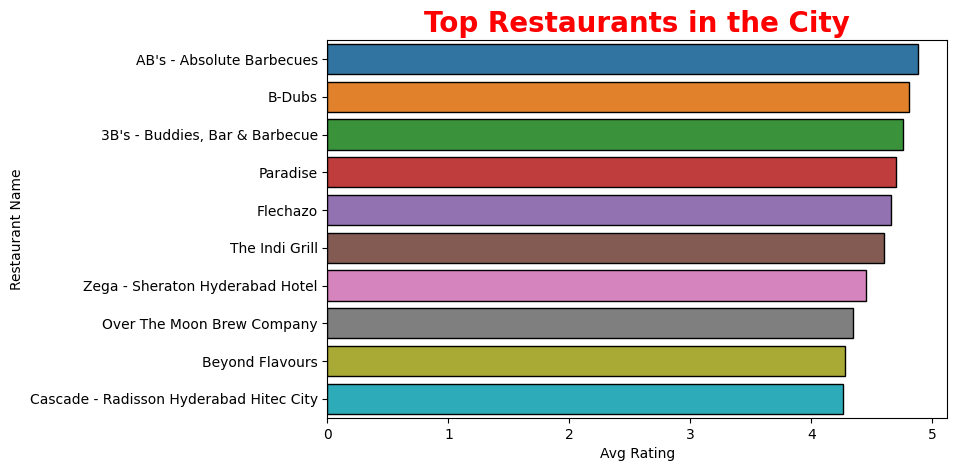

In [ ]:
#Visualizing Top Restaurants
sns.barplot(x='Avg Rating',y='Restaurant Name',data=top_restaurants1,edgecolor='black')
plt.title("Top Restaurants in the City",color='red',fontsize=20,fontweight="bold")

Most of the top rating restaurant having rating more than 4 and cost per person is also high. so we can understand if cost per person is high then quality of food served by restaurant is also high. but surely the rating of restaurant is not depends on number of cuisines in the restaurant.

**3.2 Very Lowest Rating Restaurant other than zero**

In [ ]:
lowest_rating_rest=top_restaurants.sort_values(by='Avg Rating',ignore_index=True)[5:10]
lowest_rating_rest

,Restaurant Name,Avg Rating,Total Cuisines,Cost
5,Hotel Zara Hi-Fi,2.400,2,400.0
6,Asian Meal Box,2.580,1,200.0
7,Pakwaan Grand,2.710,3,400.0
8,Mathura Vilas,2.820,3,500.0
9,Behrouz Biryani,2.825,3,600.0


Text(0.5, 1.0, 'Top 5 Lowest Rating Restaurant in Hydrabad')

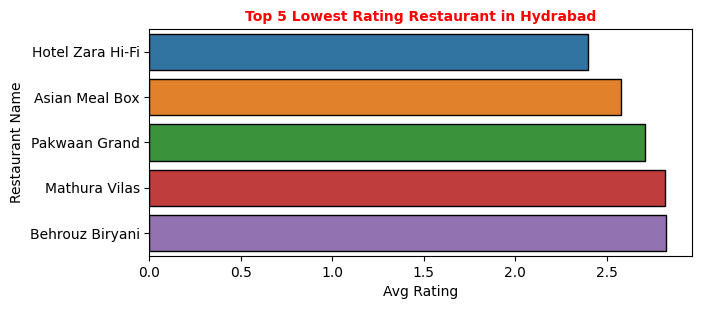

In [ ]:
#Top 5 Lowest Rating Restaurant in Hydrabad
plt.figure(figsize=(7,3))
sns.barplot(y='Restaurant Name',x='Avg Rating', data=lowest_rating_rest, edgecolor='black')
plt.title("Top 5 Lowest Rating Restaurant in Hydrabad",color='red',fontsize=10,fontweight="bold")

Depends upon cost of food the quality of food available. above bar chart shows that when customer expecting quality of food at low cost. but sometimes its may end up with low quality and customer giving low rating to the restaurant. above restaurant names are look like medium level restaurants.

**3.3 Top 5 Costlier restaurant**

In [ ]:
#top 5 costliest restaurants
costlier_rest=rest_data[['Restaurant Name','Cost']].sort_values(['Cost'],ascending=False).head()
costlier_rest

,Restaurant Name,Cost
92,Collage - Hyatt Hyderabad Gachibowli,2800.0
56,Feast - Sheraton Hyderabad Hotel,2500.0
21,Jonathan's Kitchen - Holiday Inn Express & Suites,1900.0
18,10 Downing Street,1900.0
91,Cascade - Radisson Hyderabad Hitec City,1800.0


Text(0.5, 1.0, 'Top Five Costlier Restaurant')

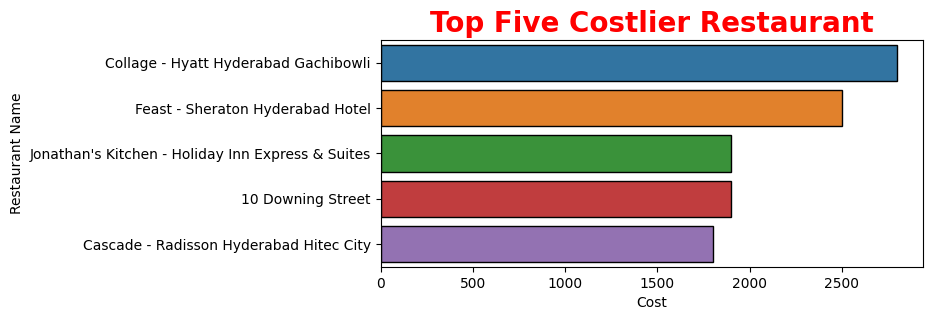

In [ ]:
#top 5 costlier restaurant in hydrabad
plt.figure(figsize=(7,3))
sns.barplot(y='Restaurant Name',x='Cost', data=costlier_rest, edgecolor='black')
plt.title("Top Five Costlier Restaurant",color='red',fontsize=20,fontweight="bold")

Sometimes rich people would like to prepare costlier restaurant and at same time cost of food per person also high. so definitely  the restaurant wont give any bad quality food. that why above bar chart shows that costlier restaurant have good rating.

**3.4 Top Five Cheapest Restaurant**

Text(0.5, 1.0, 'Top Five Cheapest Restaurant')

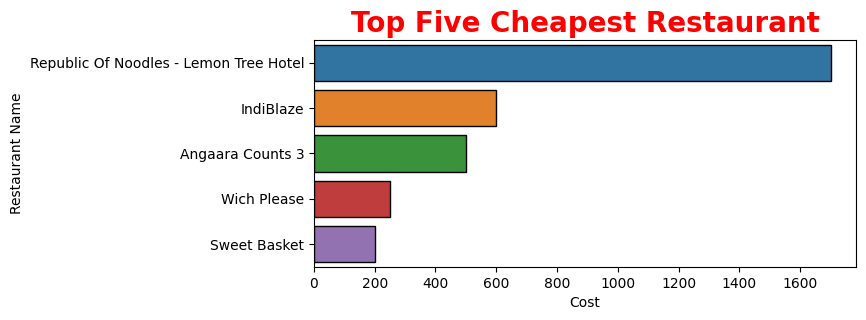

In [ ]:
#top cheapest restaurant in hydrabad
plt.figure(figsize=(7,3))
cheap_restaurant=top_restaurants[-5:].sort_values(by='Cost',ascending=False,ignore_index=True)
sns.barplot(y='Restaurant Name',x='Cost', data=cheap_restaurant, edgecolor='black')
plt.title("Top Five Cheapest Restaurant",color='r',fontsize=20,fontweight="bold")

Some middle class people cant offer much more money to food and will prepare average rang of quality. so those kind people will look into the restaurants who give the low cost per person. that why Sweet Basket restaurant ready to give at lowest rate (Rs.200).

In [ ]:
#cheapest Restaurant
cheap_restaurant

,Restaurant Name,Avg Rating,Total Cuisines,Cost
0,Republic Of Noodles - Lemon Tree Hotel,0.0,4,1700.0
1,IndiBlaze,0.0,3,600.0
2,Angaara Counts 3,0.0,3,500.0
3,Wich Please,0.0,1,250.0
4,Sweet Basket,0.0,2,200.0


**3.5.Most Popular Cuisines in Hyderabad**

In [ ]:
#creating a new dataframe for the cuisines and number of restaurants providing by them
#list of cuisines
cuisines1 = list(cuisine_dict.keys())
#creating a new dataframe
popular_cuisines = pd.DataFrame()
#creating a feature called cuisines and assigning unique cuisines as values
popular_cuisines['Cuisines'] = cuisines1
#creating a feature of sum of cuisines in the whole dataset
popular_cuisines['Total Restaurants'] = [rest_data[i].sum() for i in cuisines1]
#sort values
popular_cuisines.sort_values('Total Restaurants',ascending=False,inplace=True,ignore_index=True)
#top cuisines
top_cuisines=popular_cuisines[:10]
top_cuisines

,Cuisines,Total Restaurants
0,North Indian,64
1,Chinese,45
2,Continental,39
3,Hyderabadi,18
4,Fast Food,17
5,Italian,15
6,Asian,15
7,Desserts,14
8,Mughlai,13
9,South Indian,9


Text(0.5, 1.0, 'Top 10 Best Cuisines')

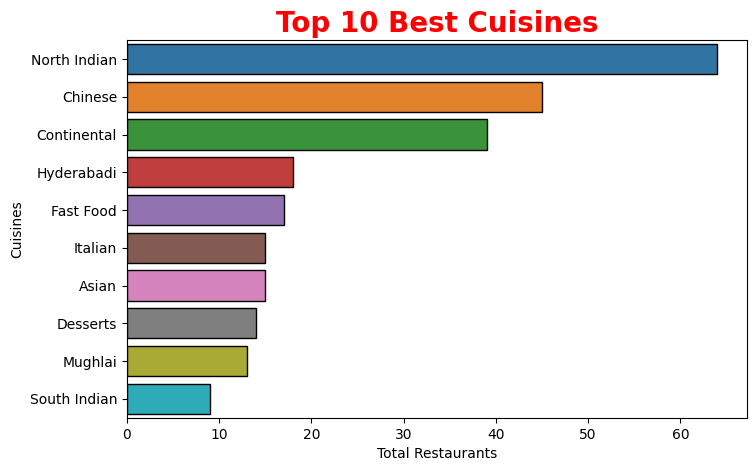

In [ ]:
#visualization of top cuisines
sns.barplot(x='Total Restaurants',y='Cuisines',data=top_cuisines,edgecolor='black')
plt.title('Top 10 Best Cuisines',color='r',fontweight='bold',size=20)

In india culture of people is different and their food also different. from Zomato most of people will prepare North Indian food followed by chinese food. obviously  people will try different konfd of food and taste, thats why chinees food restaurant available in the Hyderabad  city. But south indian food restaurant partner with zomato at low level and we may conclude that at particular city place people will prepare less south indian food. 

**3.6 Ratings Distribution**

Text(0.5, 1.0, 'Distribution of Average Restaurant Ratings in Hyderabad')

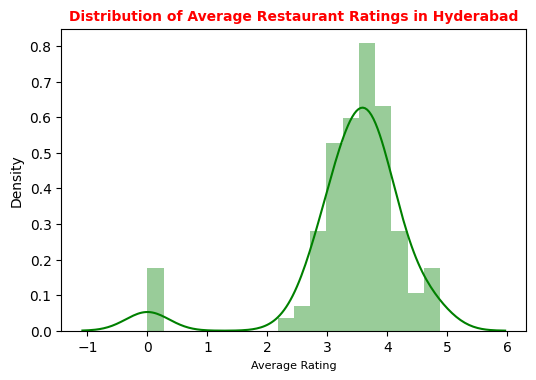

In [ ]:
#distribution of Average Ratings in Hyderabad
plt.figure(figsize=(6,4))
sns.distplot(x=rest_data['Avg Rating'],color='green')
plt.xlabel('Average Rating',size=8)
plt.title('Distribution of Average Restaurant Ratings in Hyderabad',size=10,color='r',fontweight='bold')

There aren't many restaurants in the initial restaurant dataset that haven't yet received reviews from customers; the majority of eateries have ratings between 3.5 and 4. The business should work to enhance the current restaurants by pressuring them to respond to customer feedback and include restaurants with better services in the future to improve the distribution of overall ratings.

**3.7.Cost Distribution**

Text(0.5, 1.0, 'Distribution of Cost per person in Hyderabad')

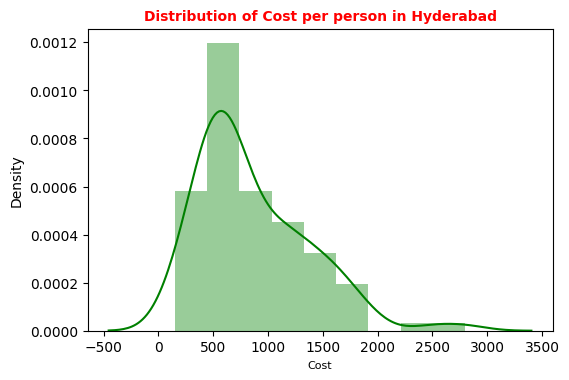

In [ ]:
#distribution of Cost in Hyderabad
plt.figure(figsize=(6,4))
sns.distplot(x=rest_data['Cost'],color='green')
plt.xlabel('Cost',size=8)
plt.title('Distribution of Cost per person in Hyderabad',size=10,color='r',fontweight='bold')

Average Cost of Restaurant is 500.

**3.8 Reviwer Dataset-Reviwer with Highest follower** 

In [ ]:
#Reviewer have Top Five Followers 
reviewers_data.loc[:, ['Reviewer','Followers']].sort_values(by='Followers',ignore_index=True,ascending=False).head()

,Reviewer,Followers
0,Satwinder Singh,13410.0
1,Eat_vth_me,13320.0
2,Samar Sardar,11329.0
3,Foodies Hyderabad,9494.0
4,Srinivas,7628.0


**Cost-Benefit Analysis**

We must consider whether a decision will be worthwhile before beginning any company initiative or taking any business action. A cost-benefit analysis compares the costs and benefits of a decision by evaluating the costs associated with making the decision and their respective implementation. We'll be making money from that choice if the anticipated advantages outweigh the costs; else, it's critical to develop a better strategy.

Zomato is an online food delivery service and a search engine for Indian restaurants. Zomato specialises on online dining bookings, loyalty programmes, and meal delivery. Restaurant chains who want to reach a wider audience and app users who simply want to sample local eateries and different cuisines are the company's target clients. Here is a straightforward cost-benefit analysis that may be performed based on the limited knowledge we have.

**Costs**

When calculating costs, start with direct costs, which are defined as costs directly associated with creating a good or service (or carrying out a project or making a business decision), in Zomato's case, principally the mobile app. A large crew needs to work on maintaining the application, developing strategies, including the restaurants, marketing, food delivery partners, and customer support. A direct expense would be the employees' salary.

Other indirect costs include utilities, rent, partners, advertisers, etc.

There are some other costs that are difficult to measure such as negative reviews on the platform which leads to people avoiding the application altogether, bad presence on social media, etc.

**Benefits**

Advertising is the main revenue generator. In order to get the attention and exposure of a significant portion of the Zomato subscriber and user base, restaurants are increasingly seeking to advertise themselves on the Zomato feed.

Through the food delivery service, Zomato charges a commission to the restaurants on the basis of orders. The company earns through restaurants that pay a commission for each delivery, which is then split among the delivery partners and the company. However, online food delivery only contributes a low percentage of income compared to other revenue streams because of the huge competition and the need to provide deep discounts, etc.

**Comparison**

The data we have includes the price per person, the menu options, and the restaurant's overall rating. Zomato will have difficulties if a restaurant has a low number of popular cuisines, a high per-person cost, and poor rating performance. Negative reviews would suffer an intangible cost for the business, and as a result, the business would begin to lose daily app users. Because of their enormous audience, Zomato receives advertising from many eateries, which is a benefit to the business.

All in all, it is important to separate out the restaurants that Zomato needs to work on in order to improve its overall customer experience and if improvement strategies don't work out, they need to delist those restaurants themselves.

#**4. Clustering Restaurant Dataset**

##**4.1 Feature Scalling**

In [ ]:
#importing minmax scaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#fitting numerical columns
numerical_cols = ['Cost','Total Cuisines','Avg Rating']
#create object of minmacscalar
scaler = MinMaxScaler()
#fit the model
scaler.fit(rest_data[numerical_cols])
#copy the dataset for just safe
scaled_rest = rest_data.copy()
scaled_rest[numerical_cols] = scaler.transform(rest_data[numerical_cols])

In [ ]:
#setting Restaurant name as index for both datasets
#restaurant dataset
rest_data.set_index(['Restaurant Name'],inplace=True)
#Scaled restaurant dataset
scaled_rest.set_index(['Restaurant Name'],inplace=True)

##**4.2 Kmeans Clustering on Cost and Ratings**

**4.2.1 Elbow Method with Two Feature**

In [ ]:
#importing kmeans
from sklearn.cluster import KMeans

In [ ]:
#Within Cluster Sum of Squared Errors for different values of k
#let's first take two variables only 
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(scaled_rest[['Cost','Avg Rating']])
    wcss.append(km.inertia_)

Text(0, 0.5, 'WCSS')

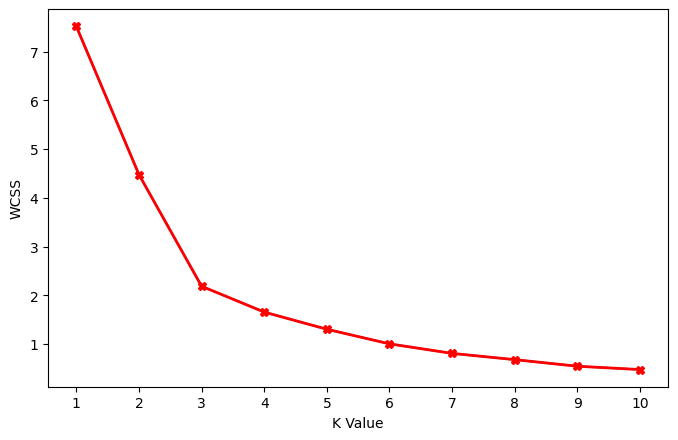

In [ ]:
#The elbow curve
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="X")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")

In this case, five clusters would be the ideal number. It is evident that the WCSS barely decreases after 5 cluster. Let's model for 5 clusters right now.

**VISUALIZATION OF 2D KMeans CLUSTERING**

In [ ]:
#copy the dataset for Visualize the Kmens Clustering
kmeans_df=scaled_rest.copy()

In [ ]:
#fit predict kmeans on 5 clusters
model = KMeans(n_clusters=5,random_state= 42)
predict = model.fit_predict(kmeans_df[['Cost', 'Avg Rating']])
kmeans_df["label"] = predict

Text(0.5, 1.0, 'Cost vs Average Rating')

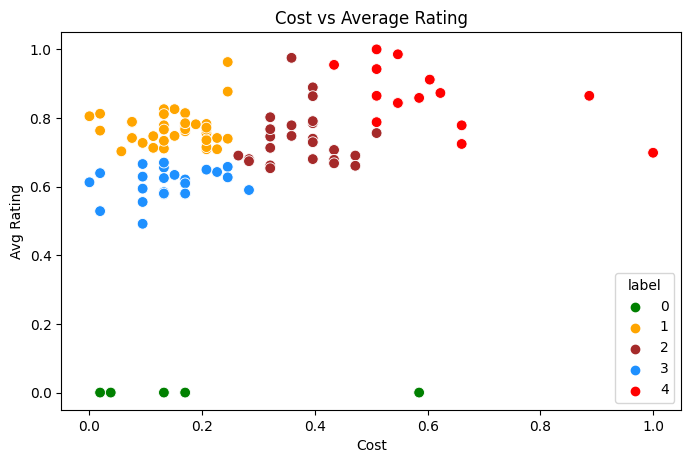

In [ ]:
#Scatterplot of the selcted K clusters
sns.scatterplot(x = 'Cost',y = 'Avg Rating',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = kmeans_df  ,s = 60 )
plt.xlabel('Cost')
plt.ylabel('Avg Rating') 
plt.title('Cost vs Average Rating')

We have two input and pretty to distinguish the cluster and interpret them easily

**Label 0**  weren't reviewed and those restaurants that were in the rest_data dataset.

**Label 1** are the restaurants that have good ratings with low pric food.

**Label 2** are fine dining restaurants with good ratings and average pricing.

**Label 3** restaurants are small food joints with low pricing but had average ratings.

**Label 4** are expensive restaurants that also had above-average ratings.

**4.2.2 Silhouette Score Method on Cost and Ratings**

In [ ]:
#importing silhouette score libray
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples, silhouette_score

X=(scaled_rest[['Cost','Avg Rating']])
#fitting the Kmeans 
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_
# finding the silhouette score
    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4438674159089557
For n_clusters = 3, silhouette score is 0.5306017812153732
For n_clusters = 4, silhouette score is 0.4147792463010934
For n_clusters = 5, silhouette score is 0.4142782289505621
For n_clusters = 6, silhouette score is 0.4328935502152979
For n_clusters = 7, silhouette score is 0.43431768393359443
For n_clusters = 8, silhouette score is 0.3970323650817419
For n_clusters = 9, silhouette score is 0.4120377778111115
For n_clusters = 10, silhouette score is 0.3943848291149457
For n_clusters = 11, silhouette score is 0.3894070261542042
For n_clusters = 12, silhouette score is 0.3829975176175914
For n_clusters = 13, silhouette score is 0.4022541624618996
For n_clusters = 14, silhouette score is 0.41594070650247494
For n_clusters = 15, silhouette score is 0.4043337789434708


Max silhouette score would be preferable  and respect cluster will be selected.but 3 cluster not sufficient to distinguish between them at maximum silhouette score 0.53. so we will select optimum level and 6 cluster is good with high silhouette score.

**4.2.3 Applying DBSCAN on Cost and Rating**

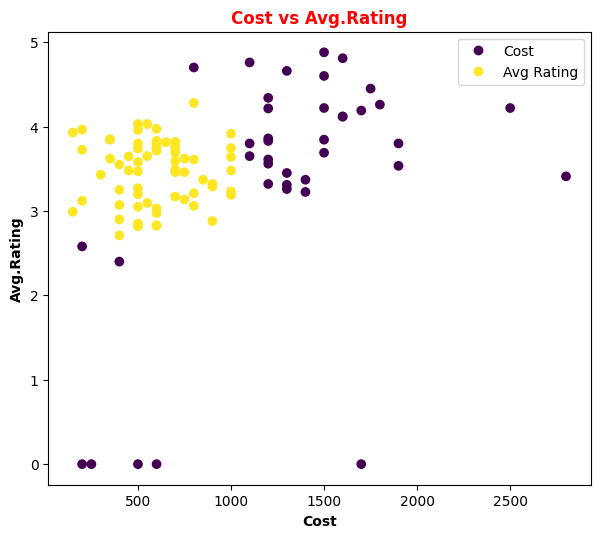

In [ ]:
#importing DBSCAN library
from sklearn.cluster import DBSCAN
#from sklearn import metrics
X=(scaled_rest[['Cost','Avg Rating']])
y_pred = DBSCAN(eps=0.1, min_samples=20).fit_predict(X)
plt.figure(figsize=(7,6))
scatter=plt.scatter(rest_data['Cost'], rest_data['Avg Rating'], c=y_pred)
plt.xlabel("Cost",fontweight='bold')
plt.ylabel("Avg.Rating",fontweight='bold')
plt.title("Cost vs Avg.Rating", color='r', fontweight='bold')
plt.legend(handles=scatter.legend_elements()[0], labels=["Cost","Avg Rating"])

DBSCAN give some good information and interpret them. but its not suffient evident to tell restaurant details.

**4.2.4 Hierarchical Clustering on Cost and Rating**

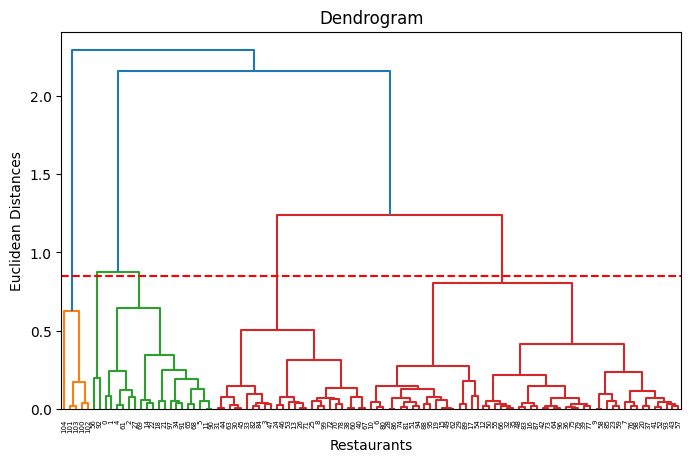

In [ ]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Restaurants')
plt.ylabel('Euclidean Distances')
plt.axhline(y=0.85, color='r', linestyle='--')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

Both Elbow and silhouette method gives optimal clusters. but one thing is that we need to give number of cluster as input . here hierarchical clustering visually showing the best number of cluster and conclude from the above analysis that 5 cluster is sufficient.

##**4.3 Multi-Dimensional KMeans Restaurant Clustering**

4.3.1 Principal Component Analysis

4.3.2 Silhouette Score

4.3.3 Kmeans Clustering

4.3.4 Cluster Exploration

**4.3.1 Principal Component Analysis**

In [ ]:
#principal component analysis
from sklearn.decomposition import PCA
#choosing 3 components
pca = PCA(n_components=3)
#fitting pca
pca_result = pca.fit_transform(scaled_rest)
#variance ratio
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# variance explained by three components
print('Cumulative variance explained by 3 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))

Explained variation per principal component: [0.19820424 0.16016826 0.08685552]
Cumulative variance explained by 3 principal components: 44.52%


**4.3.2 Silhouette Score**

Parameter: {'n_clusters': 2} Score 0.34846035036714174
Parameter: {'n_clusters': 3} Score 0.4134951573357964
Parameter: {'n_clusters': 4} Score 0.4437074359753397
Parameter: {'n_clusters': 5} Score 0.47803319795625837
Parameter: {'n_clusters': 6} Score 0.5170146504327767
Parameter: {'n_clusters': 7} Score 0.5141050068833775
Parameter: {'n_clusters': 8} Score 0.5163902758195063
Parameter: {'n_clusters': 9} Score 0.5033624484577968
Parameter: {'n_clusters': 10} Score 0.511547722173207


Text(0.5, 0, 'Number of Clusters')

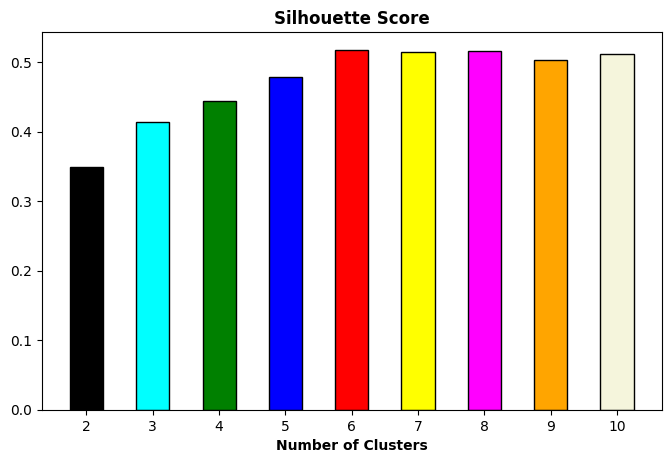

In [ ]:
#silhouette score
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
#the number of cluster
parameters = list(range(2,11))
#parameters
parameter_grid = ParameterGrid({'n_clusters': parameters})

kmeans_model = KMeans(random_state = 11)     # instantiating KMeans model
silhouette_scores = []
best_score = -1
# evaluation based on silhouette_score
for p in parameter_grid:
    kmeans_model.set_params(**p)    # set current hyper parameter
    kmeans_model.fit(pca_result)          # fit the model 
    score = silhouette_score(pca_result, kmeans_model.labels_)   # calculate silhouette_score
    silhouette_scores += [score]       # store all the scores
    print('Parameter:', p, 'Score', score)
    # check p which has the best score
    if score > best_score:
        best_score = score
        best_grid = p

# plotting 
plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color=['black', 'cyan', 'green', 'blue', 'red','yellow','magenta','orange','beige'],edgecolor='black', width=0.5)
plt.xticks(range(len(silhouette_scores)), list(parameters))
plt.title('Silhouette Score', fontweight='bold',color='black')
plt.xlabel('Number of Clusters',fontweight='bold')

For Multidimensional Restaurant dtaset gives 6 cluster at maximum silhouette score 0.5170.

**4.3.3 Kmeans Clustering**

In [ ]:
# fitting KMeans    
kmeans_pca = KMeans(n_clusters=6,random_state=11)
kmeans_pca.fit(pca_result)


KMeans(n_clusters=6, random_state=11)

In [ ]:
#fit predict kmeans 
kmeans_pca_df = pd.DataFrame(pca_result,columns=['PC1','PC2','PC3'],index=rest_data.index)
pred_pca = kmeans_pca.fit_predict(pca_result)
kmeans_pca_df["label"] = pred_pca

In [ ]:
#let's merge the labels to the original dataset and explore
kmeans_pca_df.head(2)

,PC1,PC2,PC3,label
Restaurant Name,,,,
Beyond Flavours,-0.885802,0.659062,-0.330774,2
Paradise,-0.858827,-0.606427,-0.020201,5


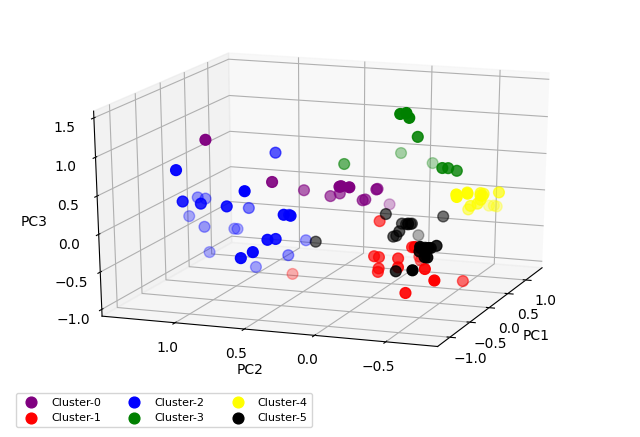

In [ ]:
#plotting 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(kmeans_pca_df.PC1[kmeans_pca_df["label"] == 0], kmeans_pca_df.PC2[kmeans_pca_df["label"] == 0], kmeans_pca_df.PC3[kmeans_pca_df["label"] == 0], c='purple', s=60)
ax.scatter(kmeans_pca_df.PC1[kmeans_pca_df["label"] == 1], kmeans_pca_df.PC2[kmeans_pca_df["label"] == 1], kmeans_pca_df.PC3[kmeans_pca_df["label"] == 1], c='red', s=60)
ax.scatter(kmeans_pca_df.PC1[kmeans_pca_df["label"] == 2], kmeans_pca_df.PC2[kmeans_pca_df["label"] == 2], kmeans_pca_df.PC3[kmeans_pca_df["label"] == 2], c='blue', s=60)
ax.scatter(kmeans_pca_df.PC1[kmeans_pca_df["label"] == 3], kmeans_pca_df.PC2[kmeans_pca_df["label"] == 3], kmeans_pca_df.PC3[kmeans_pca_df["label"] == 3], c='green', s=60)
ax.scatter(kmeans_pca_df.PC1[kmeans_pca_df["label"]== 4], kmeans_pca_df.PC2[kmeans_pca_df["label"] == 4], kmeans_pca_df.PC3[kmeans_pca_df["label"] == 4], c='yellow', s=60)
ax.scatter(kmeans_pca_df.PC1[kmeans_pca_df["label"]== 5], kmeans_pca_df.PC2[kmeans_pca_df["label"] == 5], kmeans_pca_df.PC3[kmeans_pca_df["label"] == 5], c='black', s=60)
ax.view_init(20, 200)
plt.xlabel("PC1")
plt.ylabel("PC2")
ax.set_zlabel('PC3')
plt.legend(loc='upper left', numpoints=1, ncol=3, fontsize=8, bbox_to_anchor=(0, 0),labels=['Cluster-0','Cluster-1','Cluster-2','Cluster-3','Cluster-4','Cluster-5'])


**Joining the cluster label to original Restaurant dataset**

In [ ]:
#joining the cluster labels to names dataframe
rest_data = rest_data.join(kmeans_pca_df['label'])
rest_data.head(2)

,Cost,Chinese,North Indian,Continental,Andhra,Arabian,Asian,Bakery,Beverages,Cafe,...,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food,Total Cuisines,Avg Rating,label
Restaurant Name,,,,,,,,,,,,,,,,,,,,,
Beyond Flavours,800.0,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,6,4.28,2
Paradise,800.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,4.70,5


**4.3.4 Cluster Exploration**

In [ ]:
rest_data.head(3)

,Cost,Chinese,North Indian,Continental,Andhra,Arabian,Asian,Bakery,Beverages,Cafe,...,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food,Total Cuisines,Avg Rating,label
Restaurant Name,,,,,,,,,,,,,,,,,,,,,
Beyond Flavours,800.0,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,6,4.28,2
Paradise,800.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,4.70,5
Flechazo,1300.0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,4,4.66,1


In [ ]:
#function for Cluster Cuisines
def cluster_cuisines(df):
  #setting figure size, and susplot position
  fig, axes = plt.subplots(3, 2, figsize=(20, 18))

  #iterage each cluster by for loop
  for i in range(0,6,1):
    #creae Empty Dataframe
    cluster_cuisines = pd.DataFrame()
    #cuisines list
    cuisines=list(cuisine_dict.keys())
    #row and column axes position for each subplot
    row_axes=[0,0,1,1,2,2]
    column_axes=[0,1,0,1,0,1]

    #create the column for cuisines and summing the restaurant w.r.to cuisines
    cluster_cuisines['Cuisines'] = cuisines
    df1=(df[df['label']==(i)])
    cluster_cuisines['Total Restaurants'] = [df1[i].sum() for i in cuisines]

    #create subplot
    plt.suptitle('Cluster Wise Cuisines', color="green", fontweight='bold',size=15)
    sns.barplot(x='Total Restaurants', y='Cuisines',data=cluster_cuisines,ax=axes[row_axes[i],column_axes[i]])
    axes[row_axes[i],column_axes[i]].set_title(f'The Most Popular Cuisines in Cluster {i}',size=10, color="red",fontweight='bold')
    
    #empty the dataframe for next iteration of for loop
    cluster_cuisines.empty

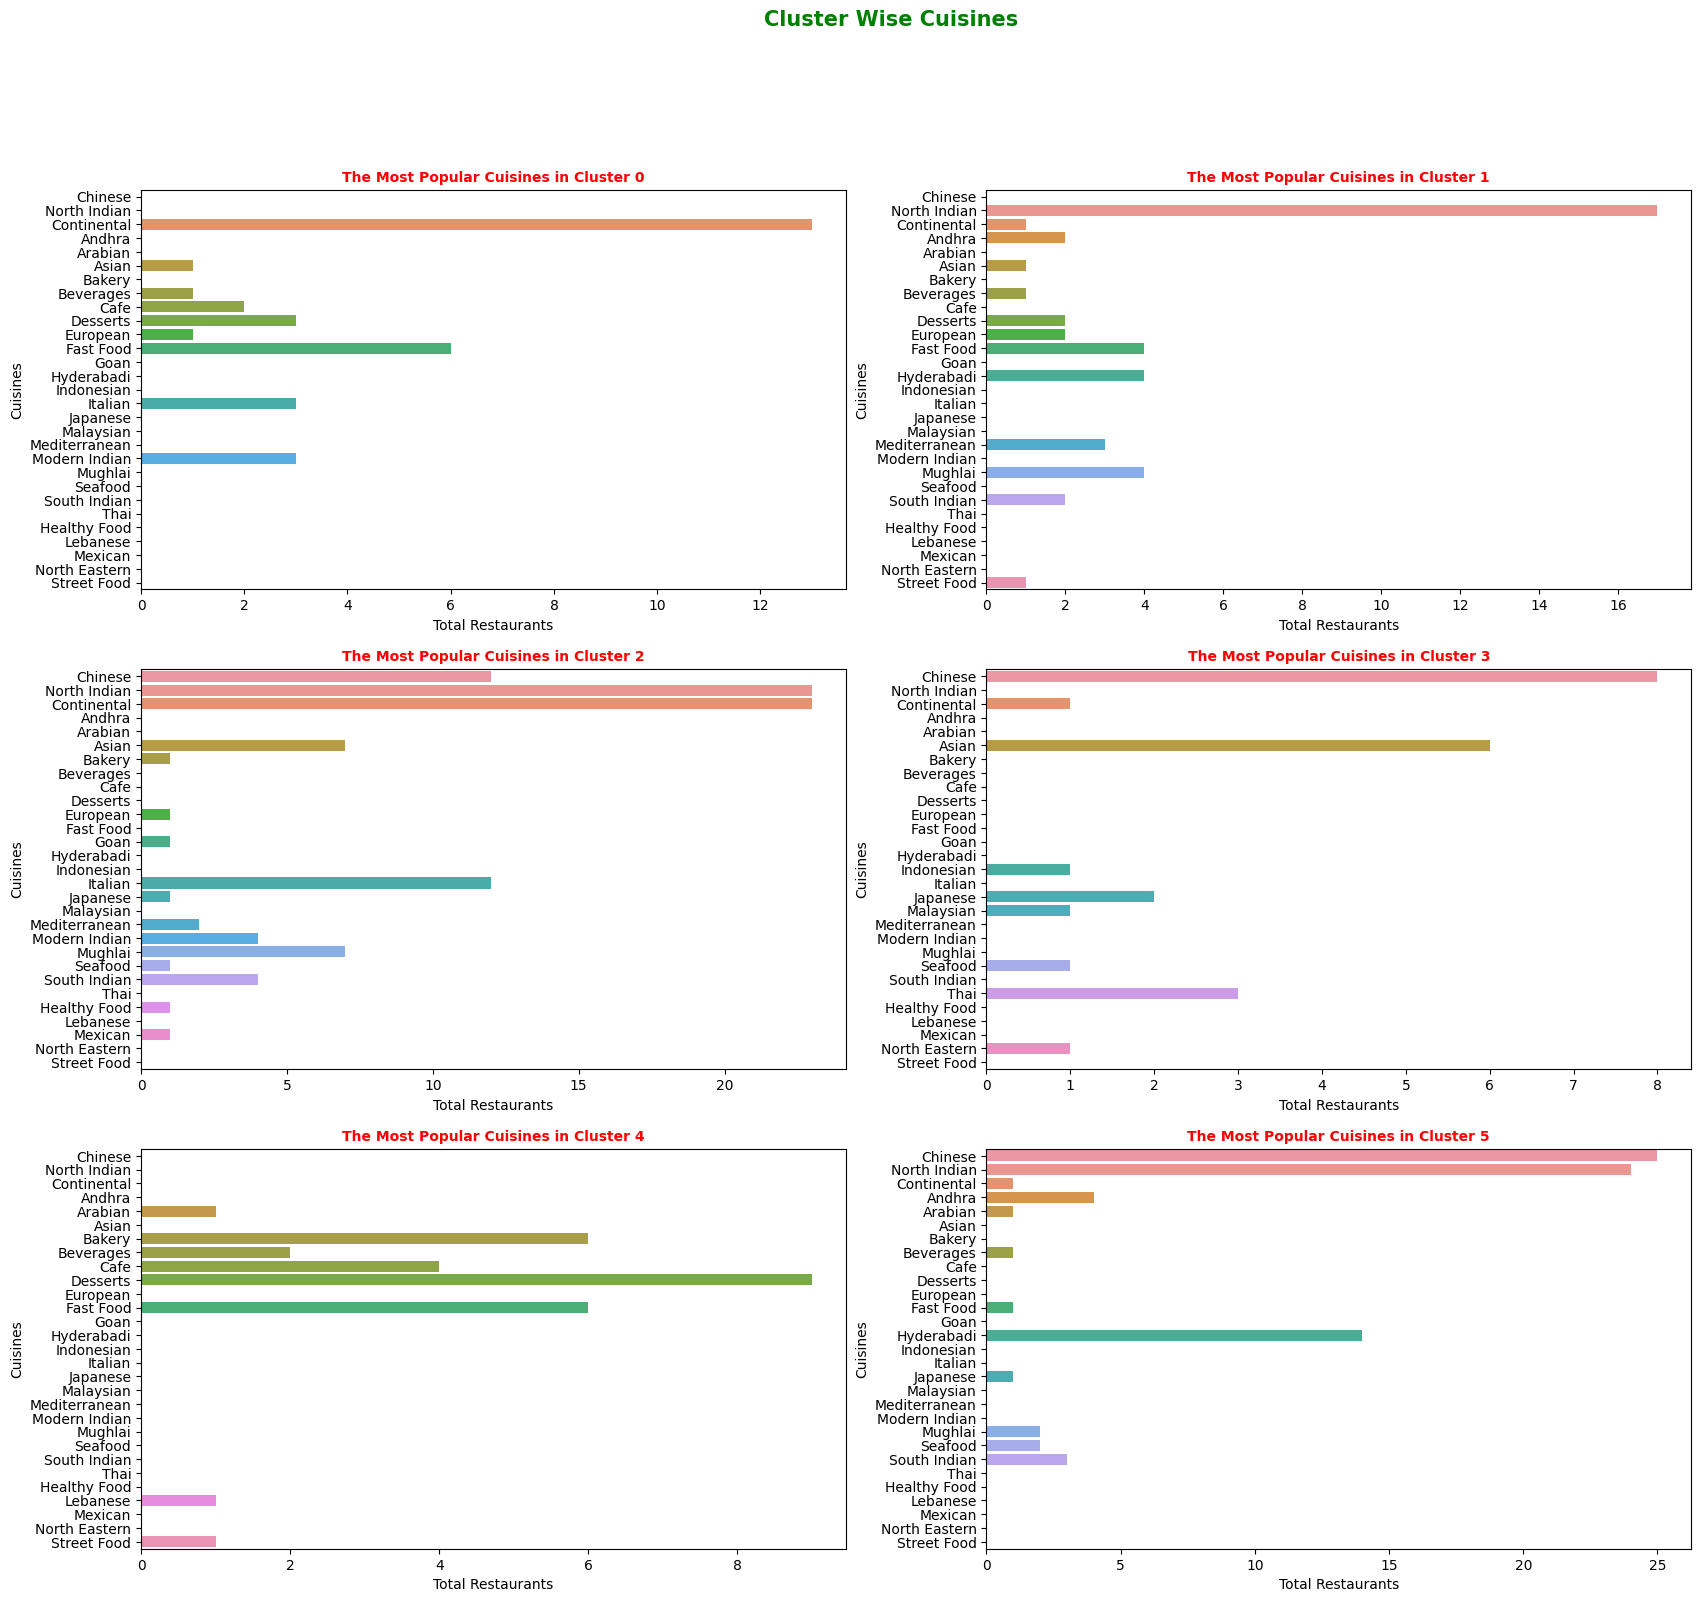

In [ ]:
#calling the cluster cuisines function and plotting all cluster label as single image
cluster_cuisines(rest_data)

**Cluster Label-0**

The restaurants in cluster 0 have mostly desert, cafe,continental and fast foods available with them.

The average rating is 3.42 and the average cost is 942 INR which includes an outlier of cost 2500 INR and median cost of 600 INR. This means the restaurants are basically cheap in nature in this cluster beside one.

**Cluster Label-1**

The restaurants in cluster 1 have mostly North Indian, chinese and other complementary foods available with them. The average rating is 3.63 and the average cost is 823 INR. These restaurants are slightly higher in prices than cluster 0.

**Cluster Label-2**

The restaurants in cluster 2 have all the popular cuisines available with them including North Indian, Chinese and Continental.

The average rating is 3.77 which is better than the other two clusters and the average cost is 1331 INR. These restaurants are fine dining restaurants.

**Cluster Label-3**

The restaurants in cluster 3 have all exotic cuisines available with them including Chinese, Thai, Asian, Seafood among others.

The average rating is 3.18 probably because these cuisines aren't that popular with the majority of the people in Hyderabad and the average cost is 890 INR.

**Cluster Label-4**

The restaurants in cluster 4 are basically small food joints, bakeries and cafes.

The average rating is 3.14 and the average cost is 406 INR.

**Cluster Label-5**

The restaurants in cluster 5 have popular cuisines available with them including North Indian, Chinese and especially Hyderabadi.

The average rating is 3.24 the average cost is 674 INR. These restaurants are casual dining restaurants with lower per person cost and rating than cluster 2.

**Labels wise Cost Distribution by Pie Chart**

In [ ]:
#summing the cost by label wise
sum_cost_labelwise=rest_data.groupby(['label'])['Cost'].sum()

In [ ]:
sum_cost_labelwise

label
0    12250.0
1    14000.0
2    31950.0
3     8900.0
4     6500.0
5    16850.0
Name: Cost, dtype: float64

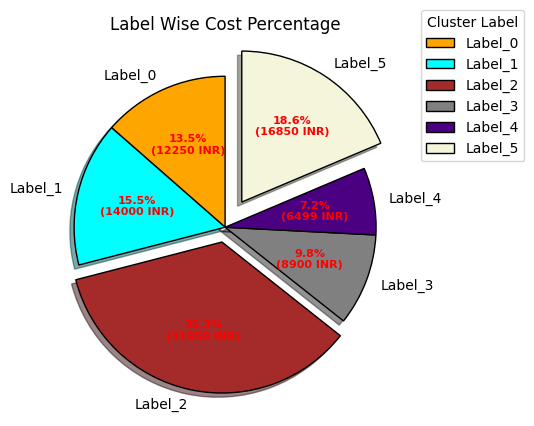

In [ ]:
#Creating the pie chart based on label against Cost
# Creating dataset
label = ['Label_0', 'Label_1', 'Label_2',
		'Label_3', 'Label_4', 'Label_5']

data = [sum_cost_labelwise]

# Creating explode data
explode = (0.0, 0.0, 0.1, 0.0, 0.0, 0.2)

# Creating color parameters
colors = ( "orange", "cyan", "brown",
		"grey", "indigo", "beige")

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "black" }

# Creating autocpt arguments
def func(pct, allvalues):
	absolute = int(pct / 100.*np.sum(allvalues))
	return "{:.1f}%\n({:d} INR)".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(5, 5))
wedges, texts, autotexts = ax.pie(data,
								autopct = lambda pct: func(pct, data),
								explode = explode,
								labels = label,
								shadow = True,
								colors = colors,
								startangle = 90,
								wedgeprops = wp,
								textprops = dict(color ="black"))

# Adding legend
ax.legend(wedges, label,
		title ="Cluster Label",
		loc ="center left",
		bbox_to_anchor =(1, 0, 0.5, 1.75))

plt.setp(autotexts, color='red',size = 8, weight ="bold")
ax.set_title("Label Wise Cost Percentage")

# show plot
plt.show()


Label-2 indicates More number of  North indian and chinese restaurant there in the dataset and cost of these restaurant is also high. thats why more sharing in the pie cahart. Richest person can visit weekly once to visit the restaurant and cost of rich restaurants also high. that why label 5 sharing second most sharing in the pie chart.

**Labels wise Rating Distribution by Pie Chart**

In [ ]:
#summing the cost by label wise
sum_rating_labelwise=rest_data.groupby(['label'])['Avg Rating'].sum()

In [ ]:
sum_rating_labelwise

label
0    44.587380
1    61.765000
2    90.640000
3    31.850000
4    50.344293
5    81.006219
Name: Avg Rating, dtype: float64

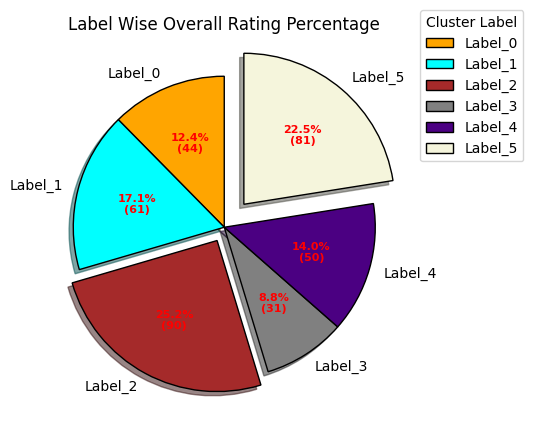

In [ ]:
#Creating the pie chart based on label against Cost
# Creating dataset
label = ['Label_0', 'Label_1', 'Label_2',
		'Label_3', 'Label_4', 'Label_5']

data = [sum_rating_labelwise]

# Creating explode data
explode = (0.0, 0.0, 0.1, 0.0, 0.0, 0.2)

# Creating color parameters
colors = ( "orange", "cyan", "brown",
		"grey", "indigo", "beige")

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "black" }

# Creating autocpt arguments
def func(pct, allvalues):
	absolute = int(pct / 100.*np.sum(allvalues))
	return "{:.1f}%\n({:d})".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(5, 5))
wedges, texts, autotexts = ax.pie(data,
								autopct = lambda pct: func(pct, data),
								explode = explode,
								labels = label,
								shadow = True,
								colors = colors,
								startangle = 90,
								wedgeprops = wp,
								textprops = dict(color ="black"))

# Adding legend
ax.legend(wedges, label,
		title ="Cluster Label",
		loc ="center left",
		bbox_to_anchor =(1, 0, 0.5, 1.75))

plt.setp(autotexts, color='red',size = 8, weight ="bold")
ax.set_title("Label Wise Overall Rating Percentage")

# show plot
plt.show()


Based on the different cluster the restaurants are categorized. label -5 show richest restaurants and rich people will come. the rating obeviously more that why label 5 showing highest number of rating then followed by Label-2 with north indian and chinese cuisines and people always prepare those kind food.so rating on label -2 is second highest rating number.

#**5.Sentiment Analysis**

**5.1.Exploratory Data Analysis on Sentiment Dataset**

In [ ]:
#Sentiment data from Review dataset
sent_data=review_df.copy()
sent_data.head(3)

,Restaurant,Reviewer,Review,Rating,Pictures,Reviews,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,0,1,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,0,3,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,0,2,3.0


**Reviewer Rating Analysis**

In [ ]:
#rating wise sentiment data analysis
rating_grp=sent_data.groupby(['Rating']).size()

In [ ]:
rating_grp

Rating
1.0    1735
1.5       9
2.0     684
2.5      19
3.0    1192
3.5      47
4.0    2374
4.5      69
5.0    3826
dtype: int64

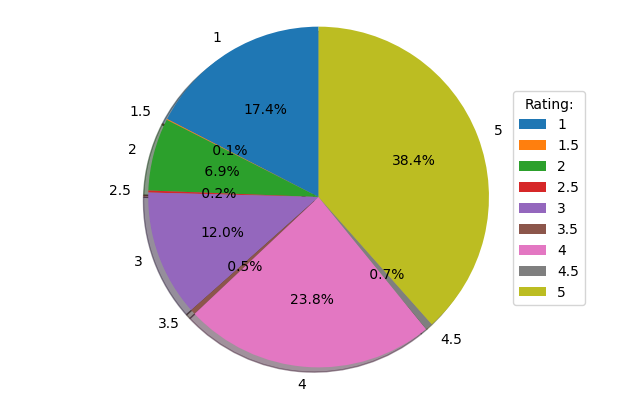

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ["1", "1.5", "2", "2.5","3","3.5","4","4.5","5"]
sizes = [rating_grp]
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%4.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(title = "Rating:",loc ="center left",
		bbox_to_anchor =(0.8, 0, 0, 1))
plt.show()

Most of the reviwer have rating with 5 and they have more number follower. because people only believe based on previouse review  before entering to restaurants. next followed by 4 rating as second highest rating. 